<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [59]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-16 04:24:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  58.9MB/s    in 3.4s    

2025-05-16 04:24:28 (59.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [61]:
!pip install pandas

In [62]:
!pip install matplotlib

In [63]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [64]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [65]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [66]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [67]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


Text(0.5, 1.0, 'Distribution of CompTotal greater than 1M')

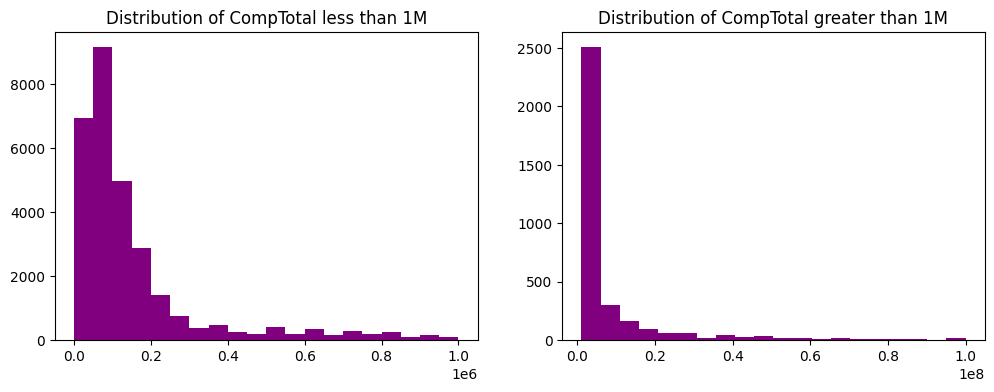

In [68]:
## Write your code here
QUERY='''
SELECT CompTotal FROM main
WHERE CompTotal <1000000 
AND CompTotal <> 0
AND CompTotal is NOT NULL
'''
df_CompTotal_under1M=pd.read_sql_query(QUERY,conn)

QUERY='''
SELECT CompTotal FROM main
WHERE CompTotal >1000000 
AND CompTotal <> 0
AND CompTotal is NOT NULL
'''
df_CompTotal_above1M=pd.read_sql_query(QUERY,conn)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(df_CompTotal_under1M,bins=20,color='purple')
axes[0].set_title('Distribution of CompTotal less than 1M')
axes[1].hist(df_CompTotal_above1M,bins=20,range=[1000000,100000000],color='purple')
axes[1].set_title('Distribution of CompTotal greater than 1M')

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


(array([13756.,  6741.,  7909.,  4744.,  4216.,  2717.,  2627.,  2065.,
         1320.,  1630.,  1148.,   885.,   432.,   454.,   357.,   248.,
          143.,    98.,    45.,    75.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ,
        28.5, 31. , 33.5, 36. , 38.5, 41. , 43.5, 46. , 48.5, 51. ]),
 <BarContainer object of 20 artists>)

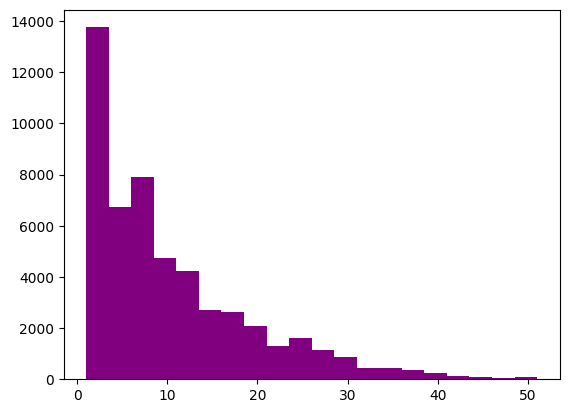

In [69]:
## Write your code here
QUERY='''
SELECT 
CASE 
    WHEN YearsCodePro='Less than 1 year' THEN 1
    WHEN YearsCodePro='More than 50 years' THEN 51
    ELSE YearsCodePro
END AS YearsCodeProNumeric
from main
WHERE YearsCodePro IS NOT NULL
'''
df_YearsCodePro=pd.read_sql_query(QUERY,conn)
#df_YearsCodePro=df_YearsCodePro.drop(columns='YearsCodePro')
df_YearsCodePro['YearsCodeProNumeric']=df_YearsCodePro['YearsCodeProNumeric'].astype('int')
plt.hist(df_YearsCodePro,bins=20,color='purple')

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


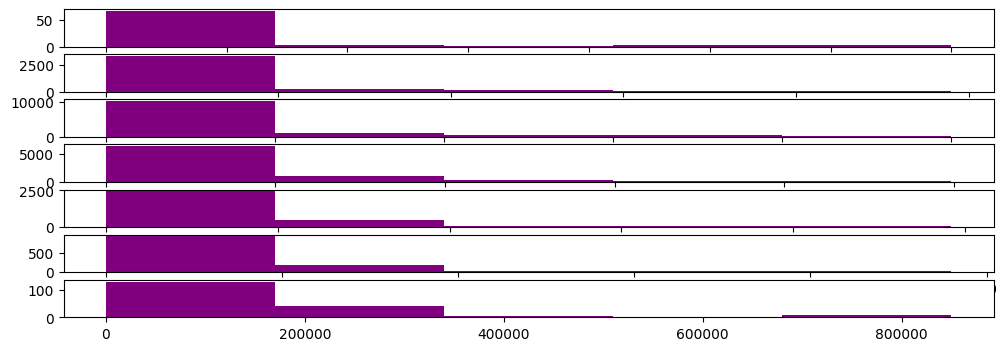

<Figure size 1000x600 with 0 Axes>

In [70]:
## Write your code here
QUERY='''
SELECT 
Age,CompTotal
FROM main
WHERE CompTotal is NOT NULL
AND CompTotal <1000000
AND Age is NOT NULL
'''
df_CompTotal_Age=pd.read_sql_query(QUERY,conn)
Age_Category=['Under 18 years old','18-24 years old','25-34 years old', 
              '35-44 years old', '45-54 years old', '55-64 years old',  
              '65 years or older']
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 4))
plt.figure(figsize=(10, 6))
i=0
for age in Age_Category:
    plot_hist=df_CompTotal_Age[df_CompTotal_Age['Age']==age]['CompTotal']
    axes[i].hist(plot_hist,bins=5,color='purple')
    i=i+1


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


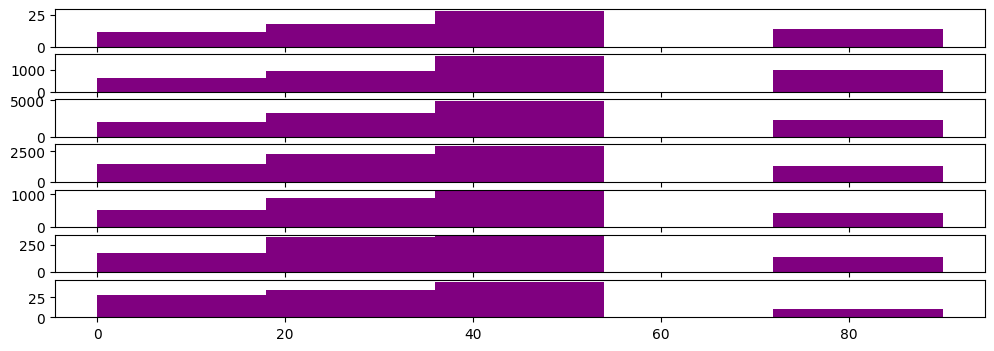

<Figure size 1000x600 with 0 Axes>

In [52]:
## Write your code here
QUERY='''
SELECT 
    CASE 
        WHEN TimeSearching = "Less than 15 minutes a day" THEN 10
        WHEN TimeSearching = "15-30 minutes a day" THEN 22.5
        WHEN TimeSearching = "30-60 minutes a day" THEN 45
        WHEN TimeSearching = "60-120 minutes a day" THEN 90
        WHEN TimeSearching = "More than 120 minutes a day" THEN 150
        ELSE 0
    END AS TimeSearchingNumeric,
    Age
FROM main
WHERE Age IS NOT NULL 
AND TimeSearching IS NOT NULL 
'''
# Execute the SQL query and load results into Pandas
df_TimeSearching_Age = pd.read_sql_query(QUERY, conn)

Age_Category= ['Under 18 years old','18-24 years old','25-34 years old', 
              '35-44 years old', '45-54 years old', '55-64 years old',  
              '65 years or older']
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 4))
plt.figure(figsize=(10, 6))
i=0
for age in Age_Category:
    plot_hist=df_TimeSearching_Age[df_TimeSearching_Age['Age']==age]['TimeSearchingNumeric']
    axes[i].hist(plot_hist,bins=5,color='purple')
    i=i+1



### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


<Axes: xlabel='DatabaseList'>

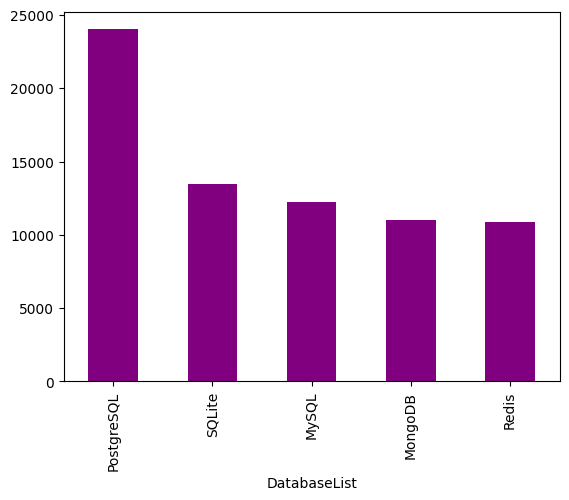

In [74]:
## Write your code here
QUERY='''
SELECT DatabaseWantToWorkWith from main
WHERE DatabaseWantToWorkWith is NOT NULL
'''
df_desired_db=pd.read_sql_query(QUERY,conn)
# Split and explode
df_desired_db['DatabaseList'] = df_desired_db['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_desired_db.explode('DatabaseList')
# Strip any leading/trailing whitespace
df_exploded['DatabaseList'] = df_exploded['DatabaseList'].str.strip()
# Count frequencies
top_5 = df_exploded['DatabaseList'].value_counts().nlargest(5)
top_5.plot(kind='bar',color='purple')

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


<Axes: xlabel='RemoteWork'>

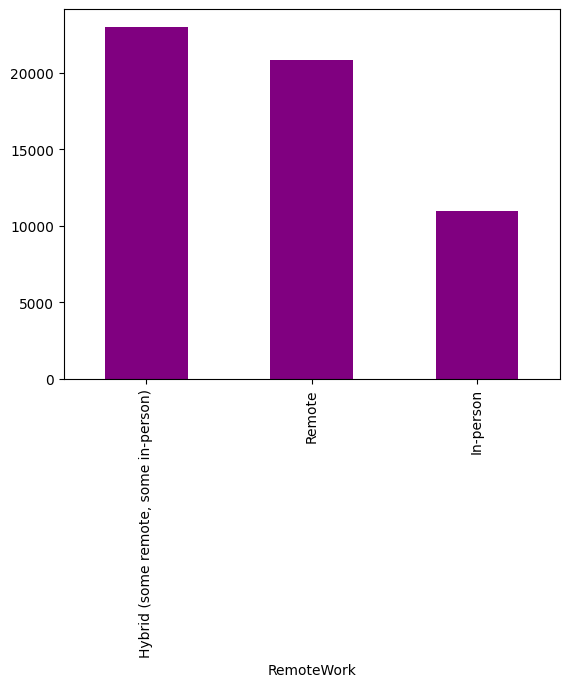

In [83]:
## Write your code here
QUERY='''
SELECT RemoteWork from main
WHERE RemoteWork is NOT NULL
'''
df_WorkLoc=pd.read_sql_query(QUERY,conn)
df_Workloc_Count=df_WorkLoc['RemoteWork'].value_counts()
df_Workloc_Count.plot(kind='bar',color='purple')

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


<Axes: xlabel='AgeNumeric'>

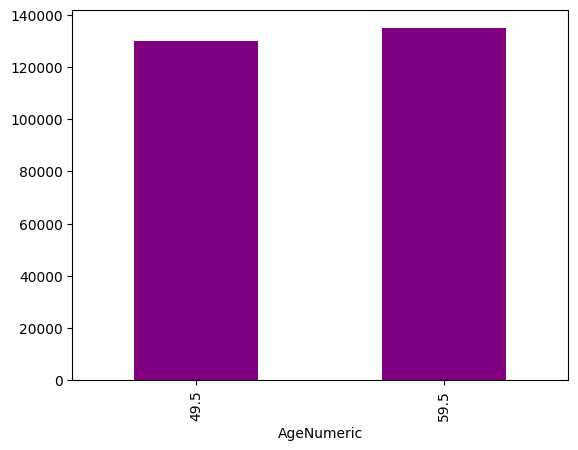

In [84]:
## Write your code here
QUERY='''
SELECT 
    CASE
        WHEN Age = 'Under 18 years old' THEN 16
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 29.5
        WHEN Age = '35-44 years old' THEN 39.5
        WHEN Age = '45-54 years old' THEN 49.5
        WHEN Age = '55-64 years old' THEN 59.5
        WHEN Age = '65 years or older' THEN 70
        ELSE 0
    END AS AgeNumeric,
    CompTotal
FROM main
WHERE Age is NOT NULL 
AND Comptotal IS NOT NULL  
'''
# Execute the SQL query and load results into Pandas
df_CompTotal = pd.read_sql_query(QUERY, conn)
df_CompTotal=df_CompTotal[(df_CompTotal['AgeNumeric']>45.0) & (df_CompTotal['AgeNumeric']<60.0)]
CompTotal_median=df_CompTotal.groupby('AgeNumeric')['CompTotal'].median()
CompTotal_median.plot(kind='bar',color='purple')

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


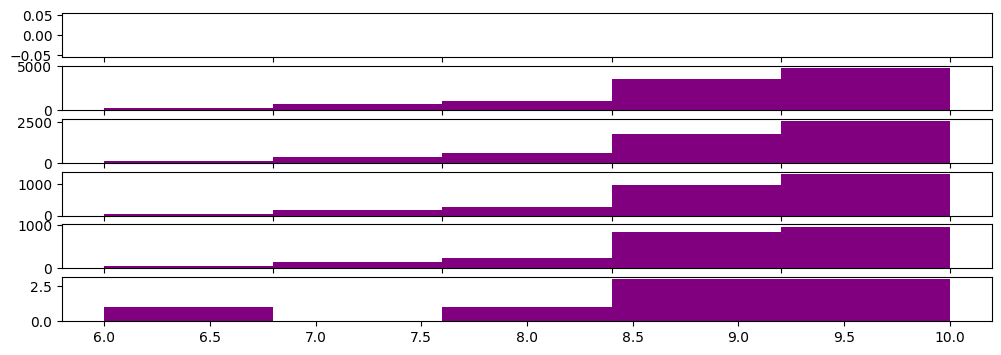

<Figure size 1000x600 with 0 Axes>

In [94]:
## Write your code here
QUERY='''
SELECT
    CASE
        WHEN YearsCodePro<10 AND YearsCodePro='Less than 1 year' THEN '<10 years'
        WHEN YearsCodePro>=10 AND YearsCodePro<20 THEN '10-20 years'
        WHEN YearsCodePro>=20 AND YearsCodePro<30 THEN '20-30 years'
        WHEN YearsCodePro>=30 AND YearsCodePro<40 THEN '30-40 years'
        WHEN YearsCodePro>=40 AND YearsCodePro<50 THEN '40-50 years'
        WHEN YearsCodePro>=50 AND YearsCodePro='More than 50 years' THEN '>50 years'
    ELSE 0
END AS YearsCodeProNumeric,
JobSat
from main
WHERE YearsCodePro IS NOT NULL 
AND JobSat IS NOT NULL
''' 
df_JobSat_YearsCodePro=pd.read_sql_query(QUERY,conn)
YearsCodePro_Category=['<10 years','10-20 years','20-30 years','30-40 years','40-50 years','>50 years']
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 4))
plt.figure(figsize=(10, 6))
i=0
for CodePro in YearsCodePro_Category:
    plot_hist=df_JobSat_YearsCodePro[df_JobSat_YearsCodePro['YearsCodeProNumeric']==CodePro]['JobSat']
    axes[i].hist(plot_hist,bins=5,color='purple')
    i=i+1


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [95]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
